# Experiment data using Minitown and MiniCPS. Attack on PLC2
This notebook has the results running cyber security experiments using MiniCPS, WNTR, and the Minitown topology. The attack in this notebook is an attack on PLC2. In this attack, an attacker takes control of the PLC2. When the attack is active, the PLC2 will ignore changes in the system and maintain the last command sent to the pumps P1 and P2. The attack is active between the iteration 300 and 450. During this time the state of the pumps never changes, even if the PLC control logic should change its state

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Baseline simulation using WNTR and no minicps (works)
no_minicps_data = pd.read_csv('../no_minicps.csv')
demand_driven_no_attack = pd.read_csv('../../ICS_topologies/minitown_topology/pressure_driven_data/no_attack/physical_process.csv')
demand_driven_attack_plc2 = pd.read_csv('../../ICS_topologies/minitown_topology/pressure_driven_data/attack_plc2/physical_results.csv')

scada_demand_driven_no_attack = pd.read_csv('../../ICS_topologies/minitown_topology/demand_driven_data/no_attack/scada_saved_tank_levels_received.csv')
scada_demand_driven_attack_plc2 = pd.read_csv('../../ICS_topologies/minitown_topology/demand_driven_data/attack_plc2/scada_saved_tank_levels_received.csv')

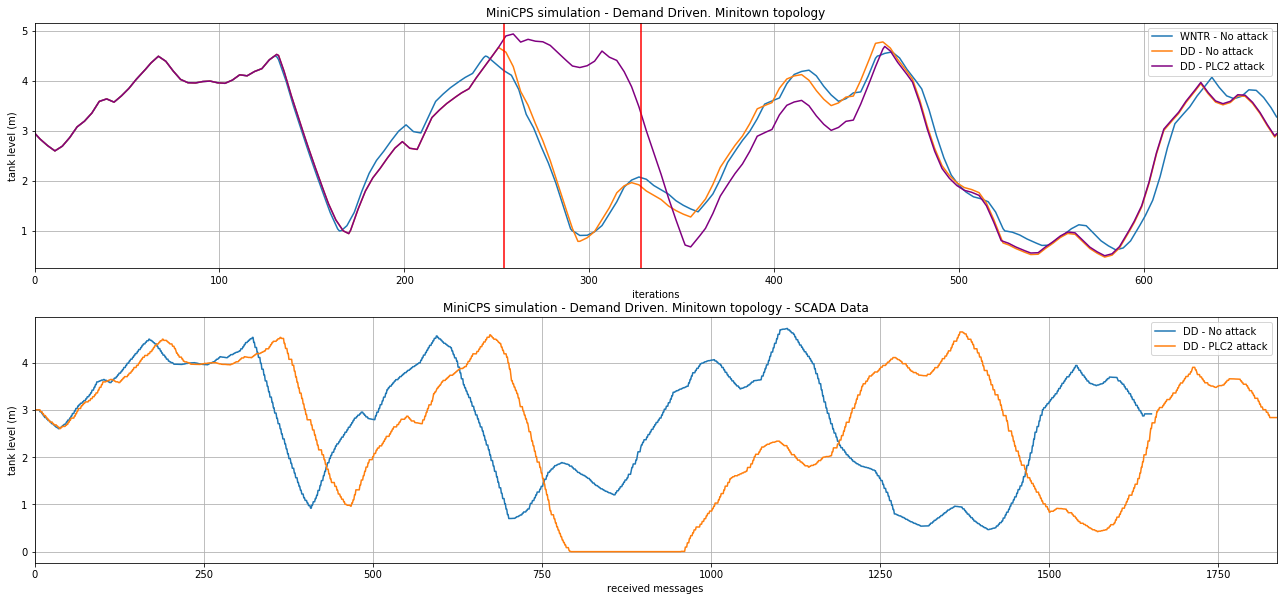

In [3]:
dd = plt.subplot(2,1,1)
no_minicps_data["TANK_LEVEL"].plot(label='WNTR - No attack', ax=dd)
demand_driven_no_attack["TANK_LEVEL"].plot(label='DD - No attack', ax=dd)
demand_driven_attack_plc2["TANK_LEVEL"].plot(label='DD - PLC2 attack', ax=dd, color="Purple")
plt.axvline(x=254, color="red")
plt.axvline(x=328, color="red")
plt.title("MiniCPS simulation - Demand Driven. Minitown topology")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

dd = plt.subplot(2,1,2)
scada_demand_driven_no_attack["TANK_LEVEL"].plot(label='DD - No attack', ax=dd)
scada_demand_driven_attack_plc2["TANK_LEVEL"].plot(label='DD - PLC2 attack', ax=dd)
plt.title("MiniCPS simulation - Demand Driven. Minitown topology - SCADA Data")
plt.xlabel('received messages')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

In the figure above, the time between the red lines indicates the time in which the attack on PLC2 is active. During this attack, the PLC2 does not send any command to the pumps. During most of the attack duration, the tank level is zero. This would cause the system not to satisfy the customers demands

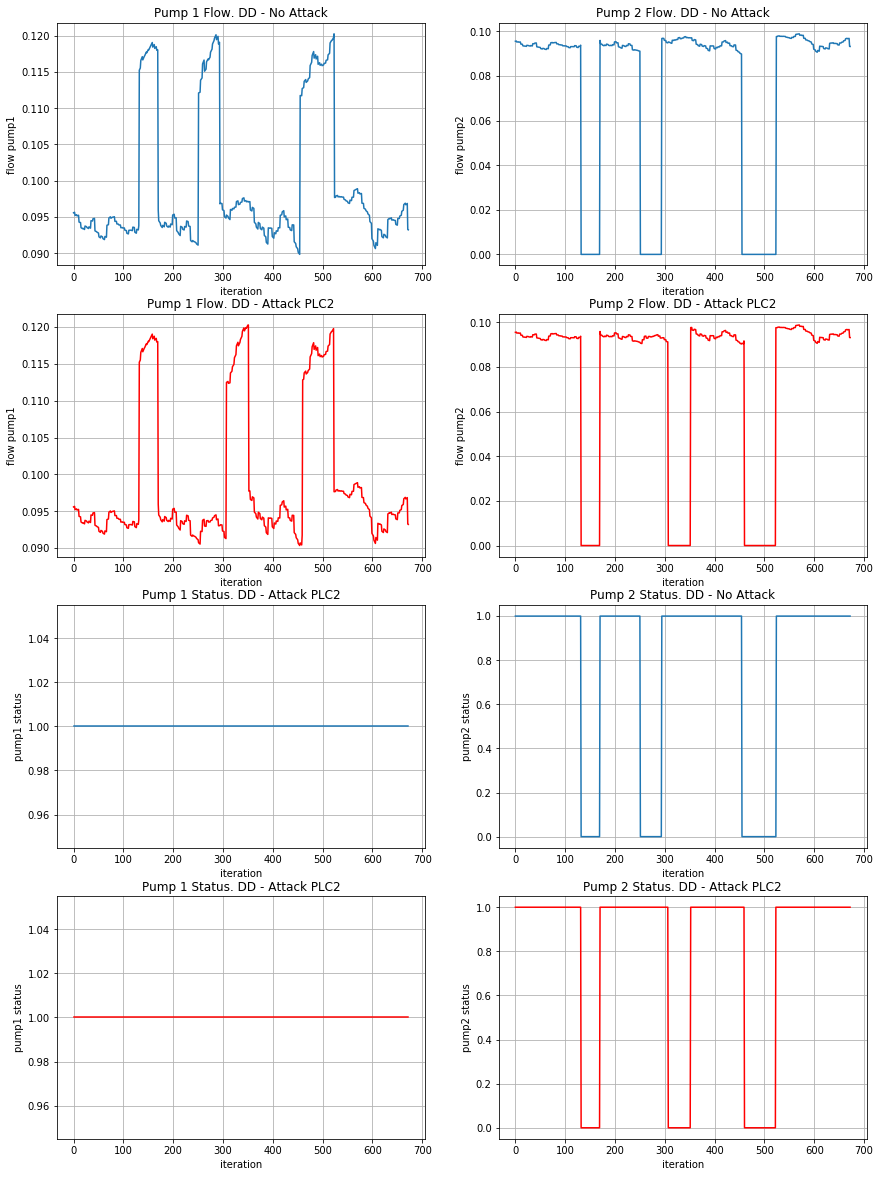

In [4]:
fp1 = demand_driven_no_attack['FLOW_PUMP1']
fp2 = demand_driven_no_attack['FLOW_PUMP2']
sp1 = demand_driven_no_attack['STATUS_PUMP1']
sp2 = demand_driven_no_attack['STATUS_PUMP2']

fp1_attack = demand_driven_attack_plc2['FLOW_PUMP1']
fp2_attack = demand_driven_attack_plc2['FLOW_PUMP2']
sp1_attack = demand_driven_attack_plc2['STATUS_PUMP1']
sp2_attack = demand_driven_attack_plc2['STATUS_PUMP2']

plt.subplot(421)
plt.plot(fp1)
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. DD - No Attack')
plt.grid(True)

plt.subplot(422)
plt.plot(fp2)
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. DD - No Attack')
plt.grid(True)

plt.subplot(423)
plt.plot(fp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. DD - Attack PLC2')
plt.grid(True)

plt.subplot(424)
plt.plot(fp2_attack,color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. DD - Attack PLC2')
plt.grid(True)

plt.subplot(425)
plt.plot(sp1)
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. DD - Attack PLC2')
plt.grid(True)

plt.subplot(426)
plt.plot(sp2)
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. DD - No Attack')
plt.grid(True)

plt.subplot(427)
plt.plot(sp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. DD - Attack PLC2')
plt.grid(True)

plt.subplot(428)
plt.plot(sp2_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. DD - Attack PLC2')
plt.grid(True)


plt.subplots_adjust(top=4.00, right=2.00)

plt.show()

With an attack on the PLC2 and using demand driven simulation. The behavior of the pump1 is not correct. The figure above shows that the flow of the pump2 is doubled, even though this pump should not change its settings. 

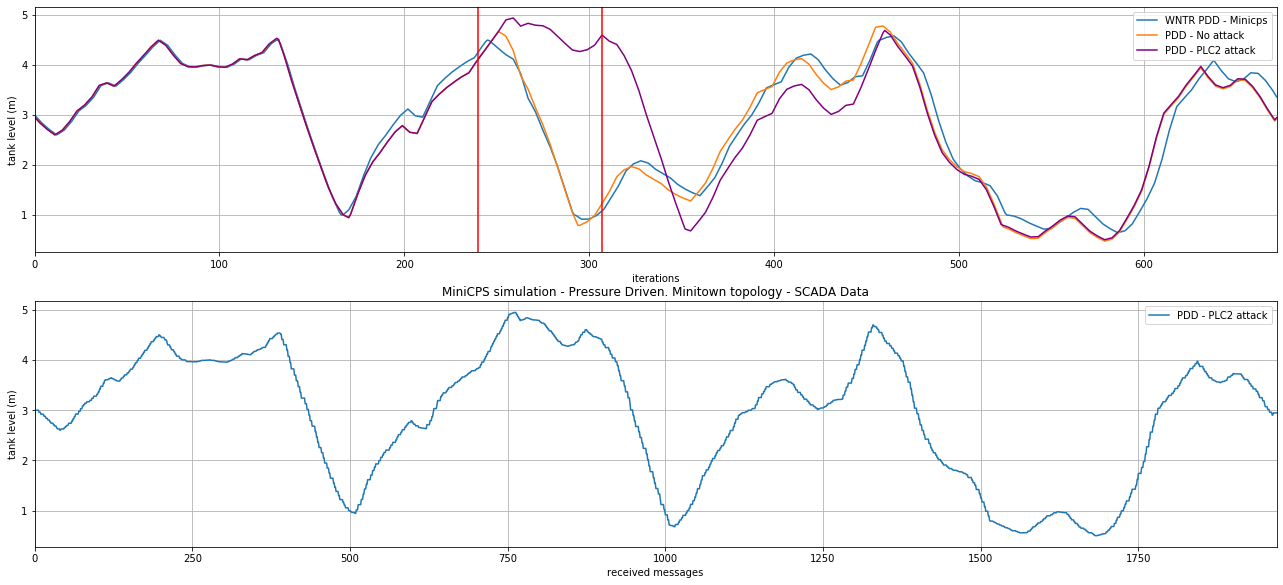

In [6]:
# Baseline simulation using WNTR and no minicps (works)
no_minicps_data_pdd = pd.read_csv('../no_minicps_pdd.csv')
pressure_driven_no_attack = pd.read_csv('../../ICS_topologies/minitown_topology/pressure_driven_data/no_attack/physical_process.csv')
pressure_driven_attack_plc2 = pd.read_csv('../../ICS_topologies/minitown_topology/pressure_driven_data/attack_plc2/physical_results.csv')

scada_pressure_driven_no_attack = pd.read_csv('../../ICS_topologies/minitown_topology/pressure_driven_data/no_attack/scada_saved_tank_levels_received.csv')
scada_pressure_driven_attack_plc2 = pd.read_csv('../../ICS_topologies/minitown_topology/pressure_driven_data/attack_plc2/scada_saved_tank_levels_received.csv')

dd = plt.subplot(2,1,1)
no_minicps_data_pdd["TANK_LEVEL"].plot(label='WNTR PDD - Minicps', ax=dd)
pressure_driven_no_attack["TANK_LEVEL"].plot(label='PDD - No attack', ax=dd)
pressure_driven_attack_plc2["TANK_LEVEL"].plot(label='PDD - PLC2 attack', ax=dd, color="purple")

plt.axvline(x=240, color="red")
plt.axvline(x=307, color="red")
# plt.title("MiniCPS simulation. Pressure Driven. Minitown topology")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

dd = plt.subplot(2,1,2)
scada_pressure_driven_attack_plc2["TANK_LEVEL"].plot(label='PDD - PLC2 attack', ax=dd)
plt.title("MiniCPS simulation - Pressure Driven. Minitown topology - SCADA Data")
plt.xlabel('received messages')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)


In the figure above, the time between the red lines indicates the time in which the attack on PLC2 is active. During this attack, the PLC2 does not send any command to the pumps. Nevertheless, with  pressure driven simulation the tank level does not go to zero. This is closer to reality because PLC2 control logic mandates that pump2 should be closed when the tank level is above 4.5. Since the PLC2 does not send a command to the pump2, water keeps being pumped to the tank. Hence increasing its level

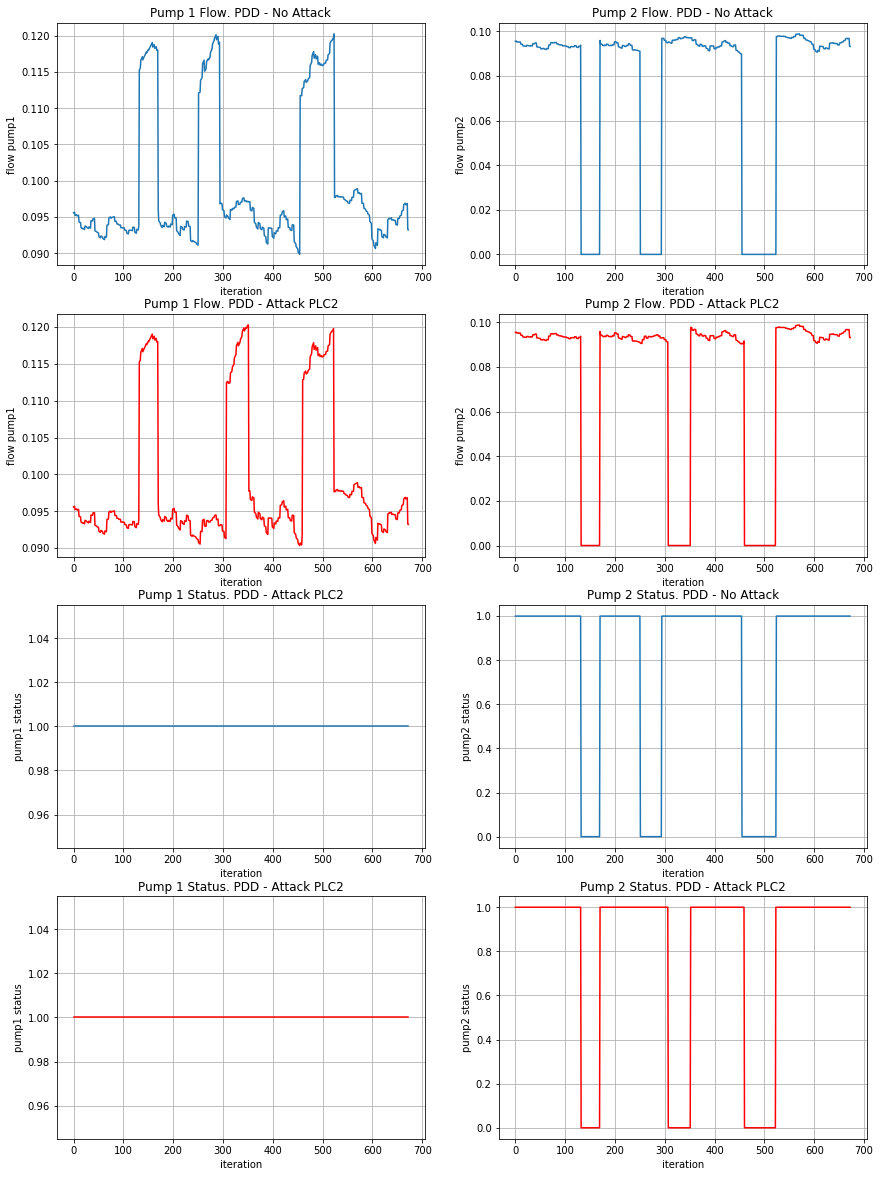

In [7]:
fp1 = pressure_driven_no_attack['FLOW_PUMP1']
fp2 = pressure_driven_no_attack['FLOW_PUMP2']
sp1 = pressure_driven_no_attack['STATUS_PUMP1']
sp2 = pressure_driven_no_attack['STATUS_PUMP2']

fp1_attack = pressure_driven_attack_plc2['FLOW_PUMP1']
fp2_attack = pressure_driven_attack_plc2['FLOW_PUMP2']
sp1_attack = pressure_driven_attack_plc2['STATUS_PUMP1']
sp2_attack = pressure_driven_attack_plc2['STATUS_PUMP2']

plt.subplot(421)
plt.plot(fp1)
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. PDD - No Attack')
plt.grid(True)

plt.subplot(422)
plt.plot(fp2)
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. PDD - No Attack')
plt.grid(True)

plt.subplot(423)
plt.plot(fp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. PDD - Attack PLC2')
plt.grid(True)

plt.subplot(424)
plt.plot(fp2_attack,color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. PDD - Attack PLC2')
plt.grid(True)

plt.subplot(425)
plt.plot(sp1)
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. PDD - Attack PLC2')
plt.grid(True)

plt.subplot(426)
plt.plot(sp2)
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. PDD - No Attack')
plt.grid(True)

plt.subplot(427)
plt.plot(sp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. PDD - Attack PLC2')
plt.grid(True)

plt.subplot(428)
plt.plot(sp2_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. PDD - Attack PLC2')
plt.grid(True)


plt.subplots_adjust(top=4.00, right=2.00)

plt.show()

Using pressure driven simulation it can be seen that now the pump1 behaves correctly